In [143]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# To get the verison details of the library used

print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.3.4
1.20.3
0.11.2


In [144]:
# loading the loan.csv file 
loan = pd.read_csv("loan.csv")

# check the total count of rows and columns
print(loan.shape)

# to access the first n rows of the file
loan.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [145]:
#to check the dupliacte in "id" column
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
#dup = loan.id.duplicated
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [146]:
# to check the if the there is row or column with null value

print("Number of row with NA value: ",loan.isnull().all(axis=1).sum())

print("Number of column with NA value: ",loan.isnull().all(axis=0).sum())

Number of row with NA value:  0
Number of column with NA value:  54


 There are lot of column with null value, so need to remove the empty row

In [147]:
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Data Cleaning

Removing the columns that are not useful in our analysis,

1) Single valued column

2) Column like id, member_id, emp_title, url, desc, title, zip_code, addr_state, last_credit_pull_d

3) Column with the Post approval data is not required as we are focusing on loan defaulting before approving loan

4) Column like out_prncp_inv, total_pymnt_inv are useful for investors but not used in our analysis 

5) Column funded_amnt can be removed as we have funded_amnt_inv to get the actual amount funded

In [148]:
loan.drop(['pymnt_plan', 'initial_list_status', 'policy_code', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
           'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'id', 'member_id','emp_title', 'url', 
           'desc', 'title', 'zip_code', 'addr_state','last_credit_pull_d', 'out_prncp_inv','total_pymnt_inv', 'funded_amnt',
           'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
           'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 
           'chargeoff_within_12_mths', 'mths_since_last_delinq', 'mths_since_last_record'], axis = 1, inplace = True)
loan.shape

(39717, 21)

In [149]:
# To see what the columns used in our analysis
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In loan_status column we have "Charged Off, Fully Paid, Current", but the analysis we are doing is who likely to be defaulted,
so it can be said only with the charged off and Current. The current can be left.

In [150]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [151]:
# Looking is there any missing values

(loan.isna().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

We have missing value in "emp_lenght and revol_util"

In [152]:
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

The analysis give that the mode value is far higher than the most frequent value so it is safe to use the mode value to null values and also the null values are low in number. So, it won't cause big difference.

In [153]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [154]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

Standardizing the data

In [155]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


# OUTLIERS CHECK

In [156]:
# Checking the annual_inc column
loan['loan_amnt'].describe()

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

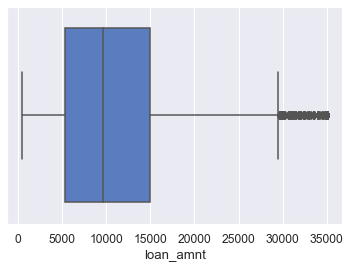

In [157]:
sns.boxplot(loan['loan_amnt'])

We have the outliers but they are not extreme. So, there is no need to remove them here

In [158]:
# Checking in annual_inc column

loan['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

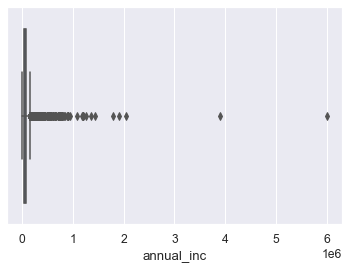

In [159]:
sns.boxplot(loan['annual_inc'])

We have an outliers in annual_income which is huge. So need to remove the outliners

In [160]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

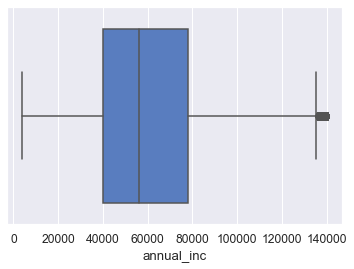

In [161]:
# so considering the value below quantile of 0.95

Quant95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= Quant95_annual_inc]
sns.boxplot(loan.annual_inc)

In [162]:
#Checking in dti column

loan['dti'].describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

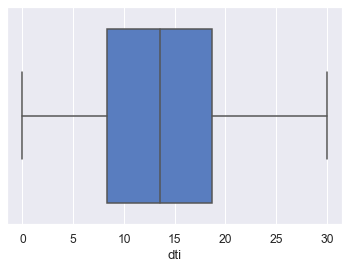

In [163]:
sns.boxplot(loan['dti'])

In [164]:
#Checking in funded_amnt_inv column

loan['funded_amnt_inv'].describe()

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

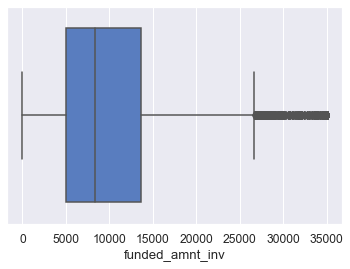

In [165]:
sns.boxplot(loan['funded_amnt_inv'])

There is outliner but it is not a huge difference and it won't affect our analysis. So, it can be left.

# Univariant analysis

## Visualization of data with Charged off value

As we have already left the current in loan_status as they are not useful for analysis. Let see the Fully paid and Charged off count.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

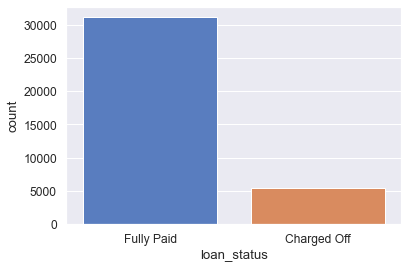

In [166]:
# Plotting loan_status

sns.countplot(x = 'loan_status', data = loan)

In [167]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

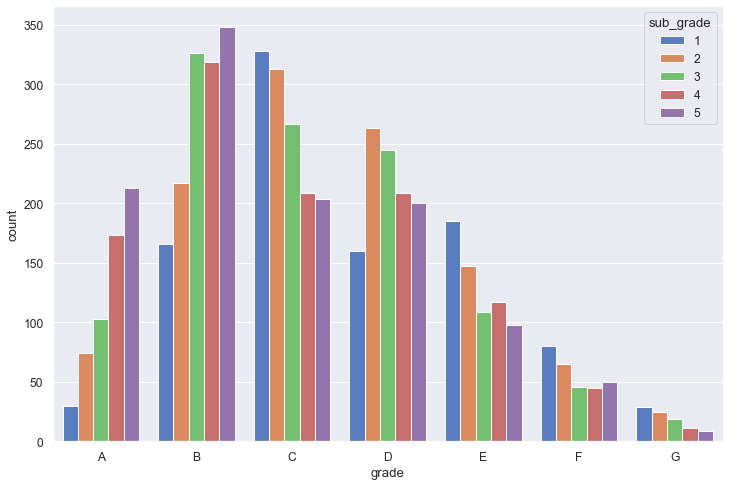

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_palette('muted')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

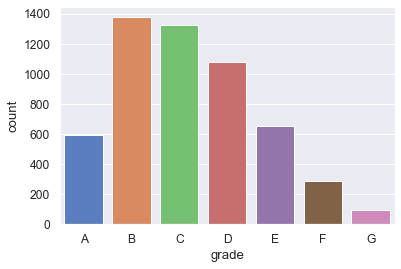

In [169]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Home_ownership analysis

In [170]:
#Checking what are the values in home_ownership

loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [171]:
# There are 3 rows with none value, replacing them with OTHER to make it better

loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [172]:
# Checking again to see the values are replaced

loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

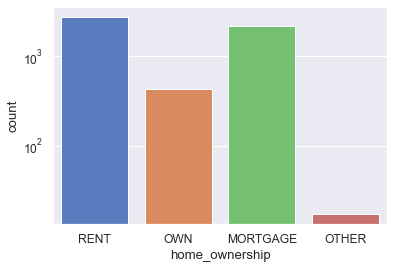

In [173]:
# Plotting the home_onwership

fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

Purpose analysis

<AxesSubplot:xlabel='purpose', ylabel='count'>

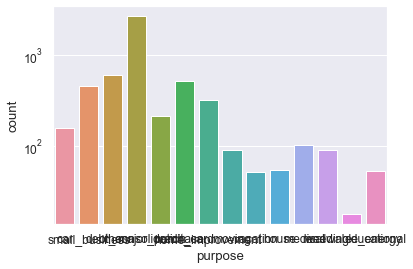

In [174]:
# Plotting the purpose
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='purpose', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

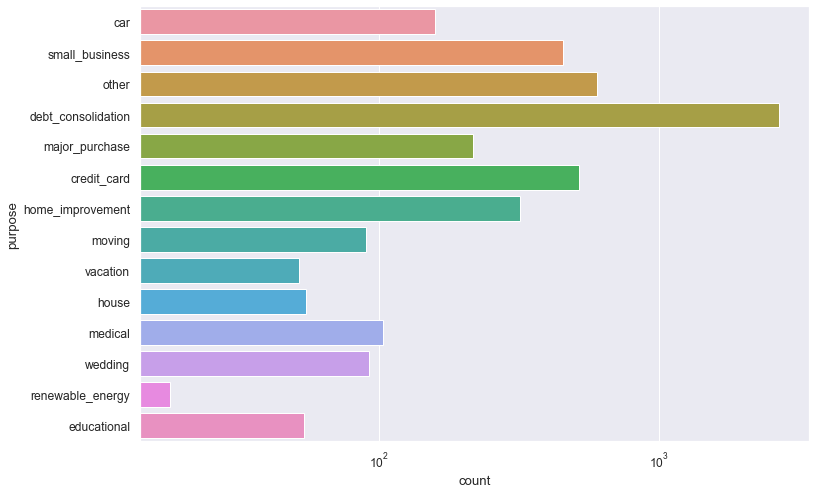

In [175]:
# As the plotting is not clear so making the axis to Y axis so it can make a clear view

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y='purpose', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

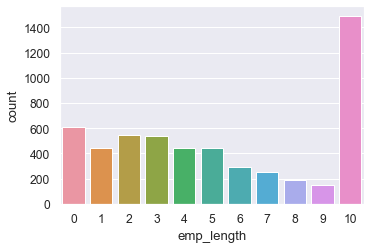

In [176]:
# Plotting the emp_lenght
fig, ax = plt.subplots(figsize = (12,8))
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan['loan_status']=='Charged Off'])

Creating bins for int_rate, open_acc, revol_util, total_acc, annual_inc variable to make them categorical

In [177]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_labels'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_labels'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_labels'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_labels'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_labels'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_labels,open_acc_labels,revol_util_labels,total_acc_labels,annual_inc_labels
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


Plotting for bins that are created

1. int_rate_labels
2. open_acc_labels
3. revol_util_labels
4. total_acc_labels
5. annual_inc_labels

Text(0.5, 0, 'Interest rate')

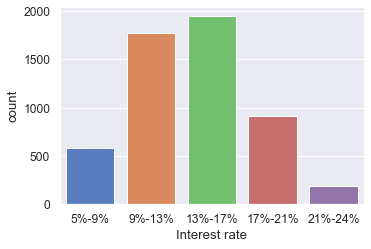

In [178]:
# int_rate_labels

fig, ax = plt.subplots(figsize = (12,8))
plt.subplot(222)
sns.countplot(x='int_rate_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Interest rate')

Text(0.5, 0, 'Number of open credit lines')

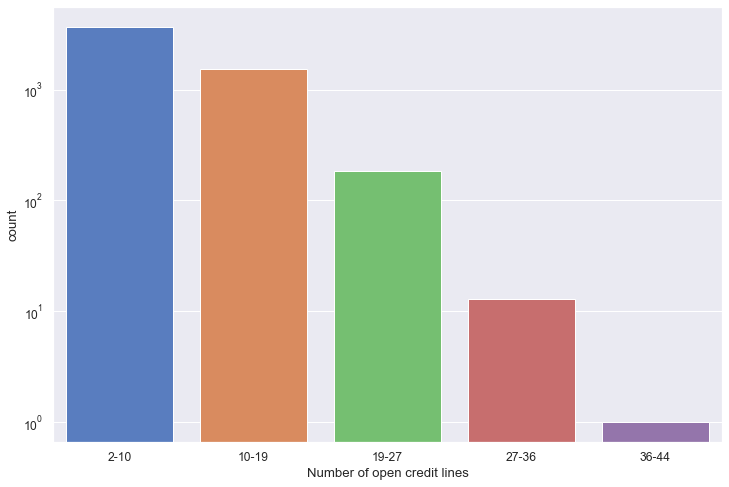

In [179]:
# open_acc_labels

fig, ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='open_acc_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Number of open credit lines')

Text(0.5, 0, 'Revolving line utilization rate')

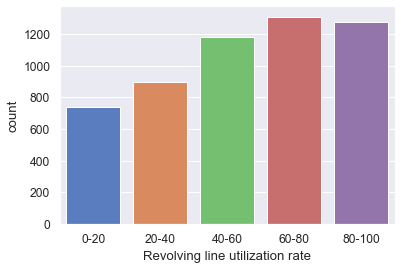

In [180]:
# revol_util_labels

sns.countplot(x='revol_util_labels', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Revolving line utilization rate')

Text(0.5, 0, 'Total number of current credit lines')

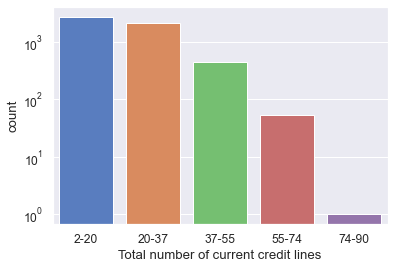

In [181]:
# total_acc_labels

fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='total_acc_labels', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Total number of current credit lines')

Text(0.5, 0, 'Annual Income')

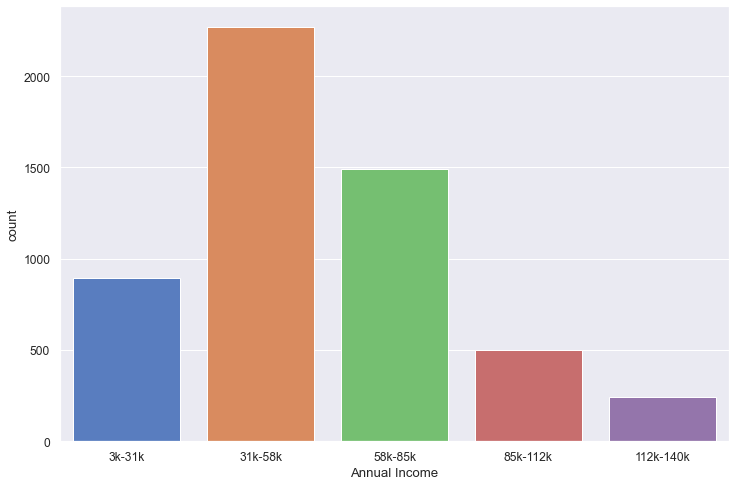

In [183]:
# annual_inc_lables

fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='annual_inc_labels', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Annual Income')

Text(0.5, 0, 'Loan period')

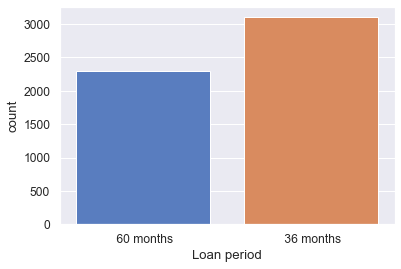

In [184]:
# Plotting of loan period 36 or 60 month for charged off 

sns.countplot(x='term', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Loan period')

Text(0.5, 0, 'Verification status')

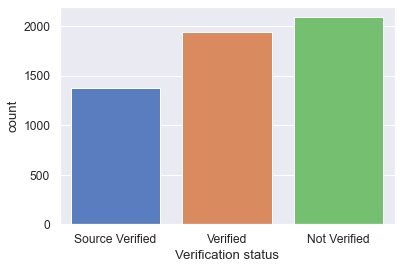

In [185]:
#Plotting of Verification status for charged off

sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Verification status')

Text(0.5, 0, 'Inquiries in past 6 months')

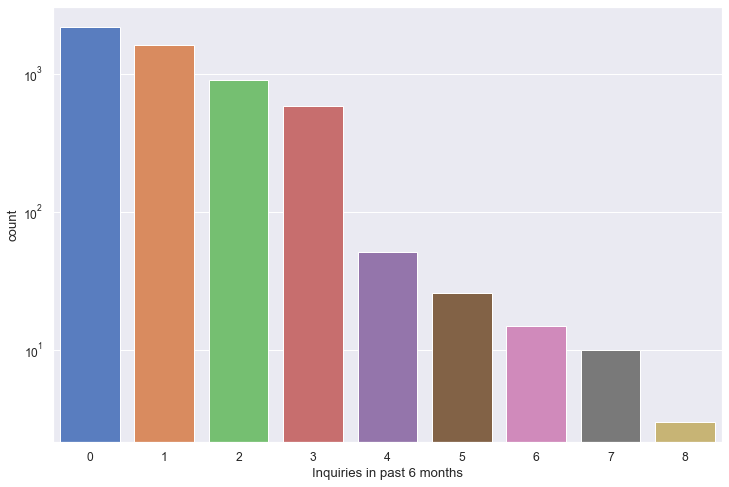

In [186]:
#Plotting inquiries in past 6 months

fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Inquiries in past 6 months')

Text(0.5, 0, 'Derogatory of Public record')

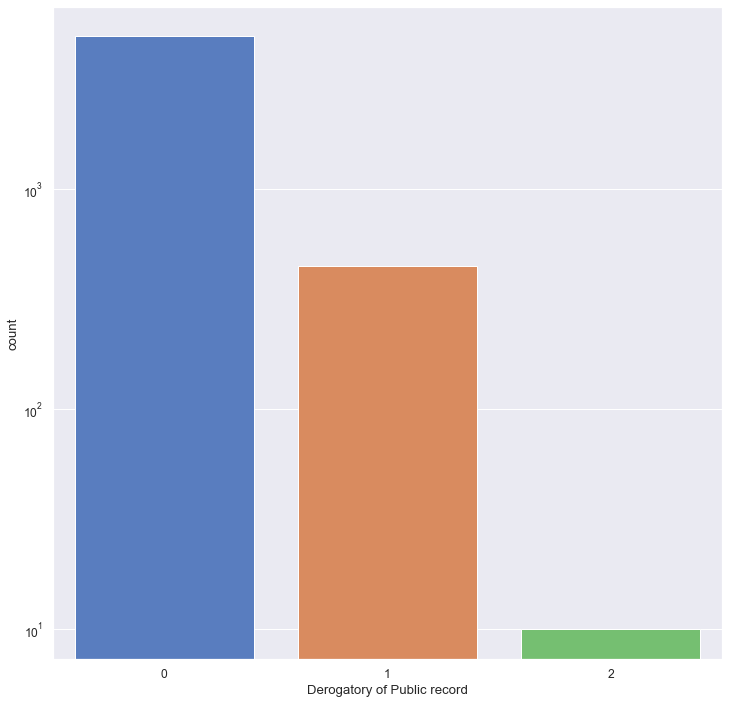

In [187]:
#Plotting Derogatory of public record  

fig,ax = plt.subplots(figsize = (12,12))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Derogatory of Public record')

Issued month and year analysis

In [188]:
# Extracting month and year

month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_mn']= month_year[0]                       
loan['issue_yr']= '20' +month_year[2]
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_labels,open_acc_labels,revol_util_labels,total_acc_labels,annual_inc_labels,issue_mn,issue_yr
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


Text(0.5, 0, 'Issue month')

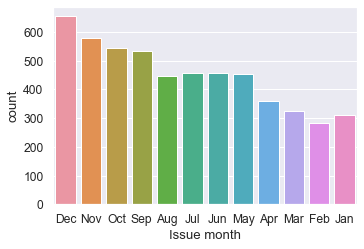

In [189]:
# Plotting of issue month for charged off

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x='issue_mn', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Issue month')

Text(0.5, 0, 'Issue Year')

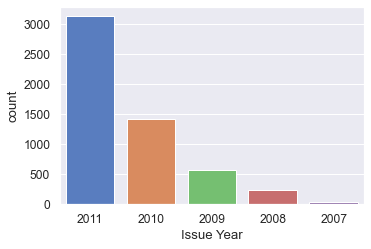

In [190]:
# Plotting of issue year for charged off

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot(x='issue_yr', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Issue Year')

Creating bins for installment, dti, loan_amnt, funded_amnt_inv variable 

In [191]:
#creating bins for installment, dti, loan_amnt, funded_amnt_inv_group

loan['installment_labels'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_labels'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_labels'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_labels'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_labels,revol_util_labels,total_acc_labels,annual_inc_labels,issue_mn,issue_yr,installment_labels,funded_amnt_inv_labels,loan_amnt_labels,dti_labels
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20-37,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


Text(0.5, 0, 'Monthly payment')

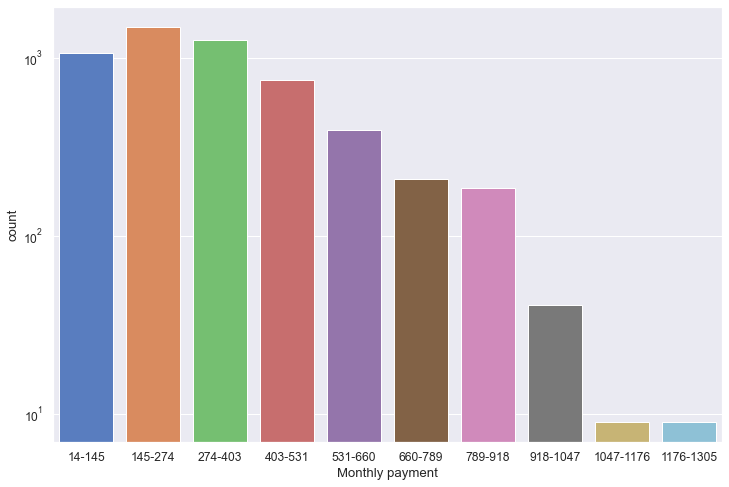

In [192]:
# Plotting monthly payment (installment_labels) for charged off 

fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='installment_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Monthly payment')

Text(0.5, 0, 'Total amount committed by investors')

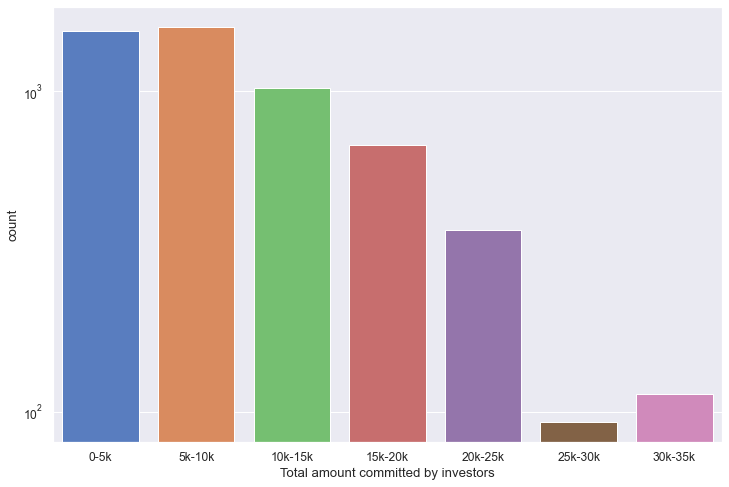

In [193]:
# Plotting total amount committed by investors (funded_amnt_inv_labels) for charged off 

fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Total amount committed by investors')

Text(0.5, 0, 'Loan amount')

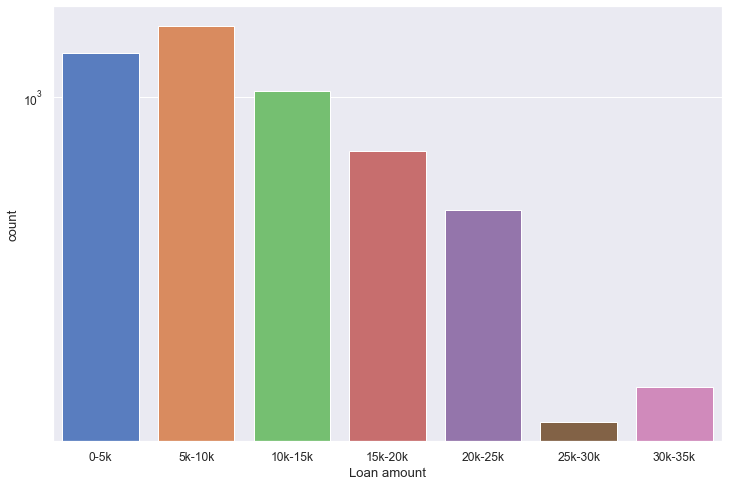

In [194]:
# Plotting Loan amount (loan_amnt_labels) for charged off 

fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Loan amount')

Text(0.5, 0, 'dti')

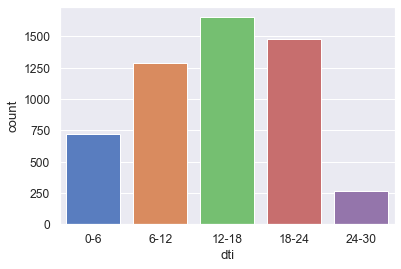

In [195]:
# Plotting dti (dti_labels) for charged off 

sns.countplot(x='dti_labels', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('dti')

Observation

From the plot the following applicant has the high chance of Charged off

1) The applicant with the grade B and C, that too in the sub_grade of 5

2) The applicant with home onwership of RENT and MORTAGE

3) The applicant who took the loan on as the purpose debt_consolidation

4) The applicants with employement length of 10

5) The Applicants with Interest rate of 9% - 17%

6) The Applicants with open credit lines of 2-10

7) The Applicants with revol_util of 60-80

8) The Applicants with annual income of 31k-58k

9) The Applicants with loan period of 36 months

10) The Applicants who has the Not verified status

11) When the no of enquiries in last 6 months is 0

12) The Applicants with 0 Degogatory of public record

13) The Applicants with the monthly installment of 145-403

14) The Applicants with the loan amount between 5k-10k

15) Dti between 12-24

This are observation collected from the above procedure.

There is the interesting analysis that the high charged off in the month of December. That too in the year of 2011.

# Bivariant analysis

## Comparing Annual income with other column to get better insights

### Annual income vs Loan amount

Text(0, 0.5, 'Loan Amount')

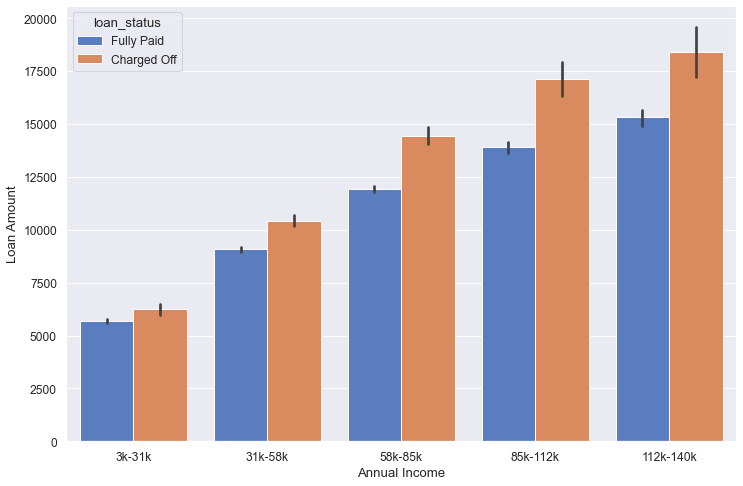

In [196]:
plt.figure(figsize=(12,8))
sns.barplot(x = "annual_inc_labels", y = "loan_amnt", hue = 'loan_status', data = loan)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

From the above plot it is clear that if the loan amount is higher than the annual income. Then there is high chance of Charged off.

## Annual income vs Interest rate

Text(0, 0.5, 'Annual Income')

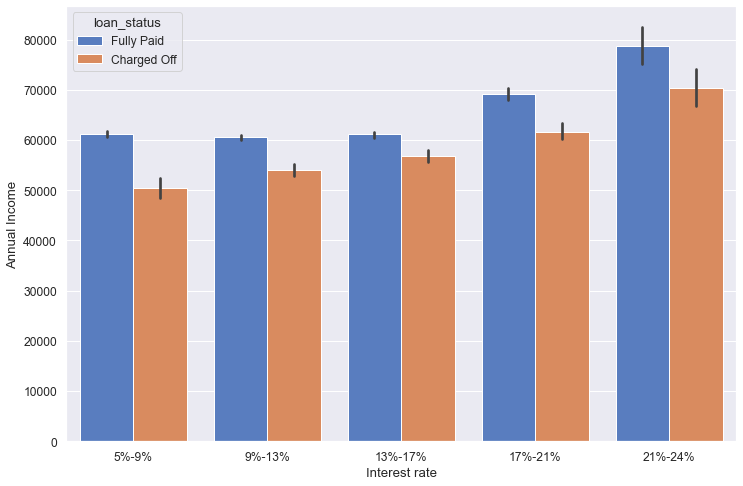

In [197]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='int_rate_labels', y='annual_inc', hue ='loan_status',palette="muted")
plt.xlabel('Interest rate')
plt.ylabel('Annual Income')

Low income with high interest rate can lead to high chance of Charged off

## Annual income vs Loan Purpose 

Text(0, 0.5, 'Loan purpose')

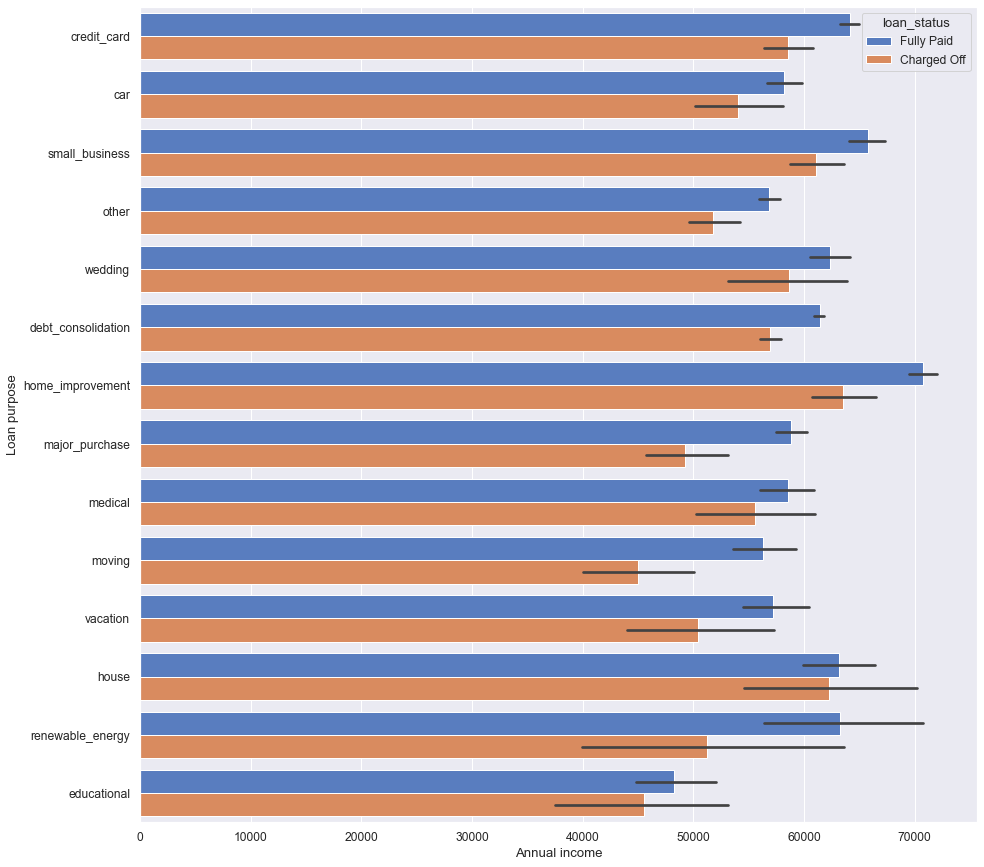

In [198]:
plt.figure(figsize=(15,15))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="muted")
plt.xlabel('Annual income')
plt.ylabel('Loan purpose')

The person with income around (50k - 60k) applied for house, debt_consolidation, small business are high chance of Charged off

In that debt_consolication has the low income range. It may be reason of high charged off 

## Annual income vs Home ownership

Text(0, 0.5, 'Home Onwership')

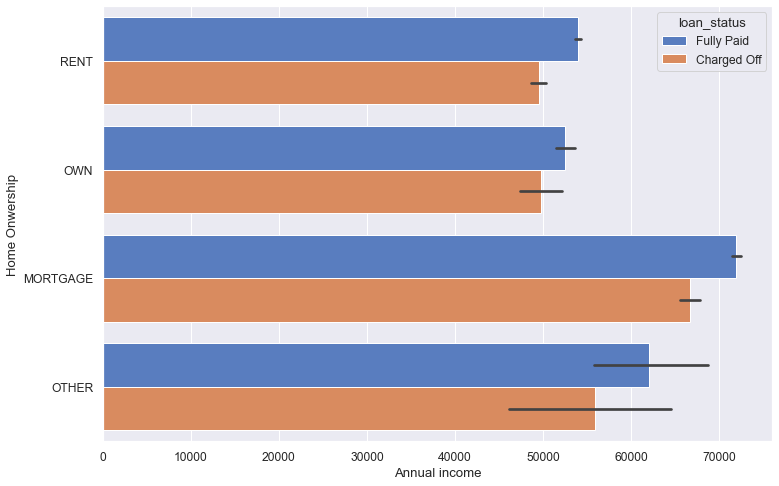

In [199]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='annual_inc', y='home_ownership', hue ='loan_status',palette="muted")
plt.xlabel('Annual income')
plt.ylabel('Home Onwership')

# Comapring Loan amount with other column to get more deatails

## Loan amount vs Interest rate 

Text(0, 0.5, 'Interest rate')

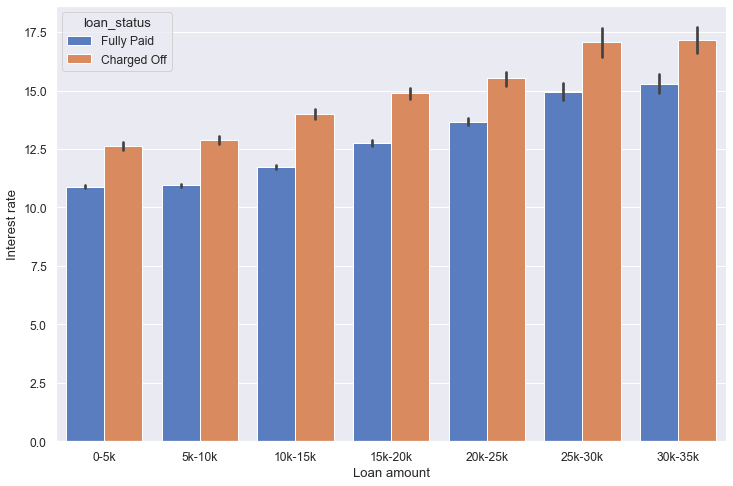

In [200]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='loan_amnt_labels', y='int_rate', hue ='loan_status',palette="muted")
plt.xlabel('Loan amount')
plt.ylabel('Interest rate')

Loan amount with high interest rate has a high chance of Charged off

## Loan amount vs Loan purpose

Text(0, 0.5, 'Loan Purpose')

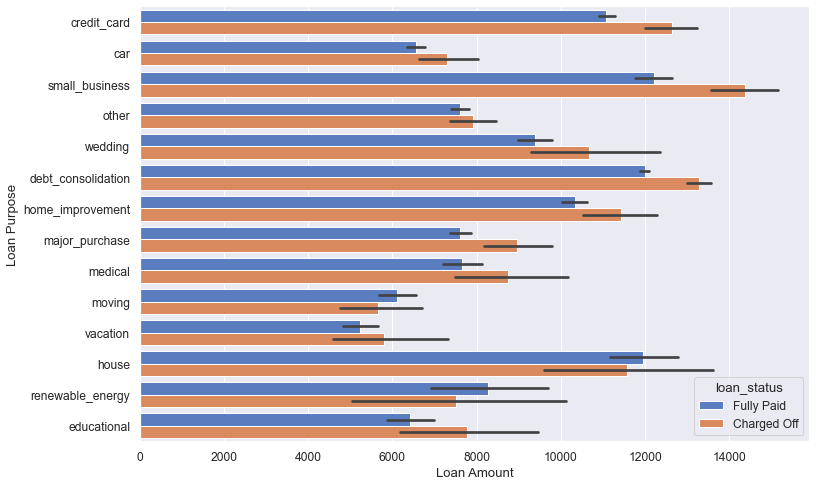

In [201]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="muted")
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')

Loan amount is high for House, debt_consolidation, small_business as there is high chance of Charged off

## Loan amount vs Month and year of loan issued

### As we already seen the December month and the year of 2011 has higher charged off rate and now let see the loan amount issued.

Text(0, 0.5, 'Loan amount')

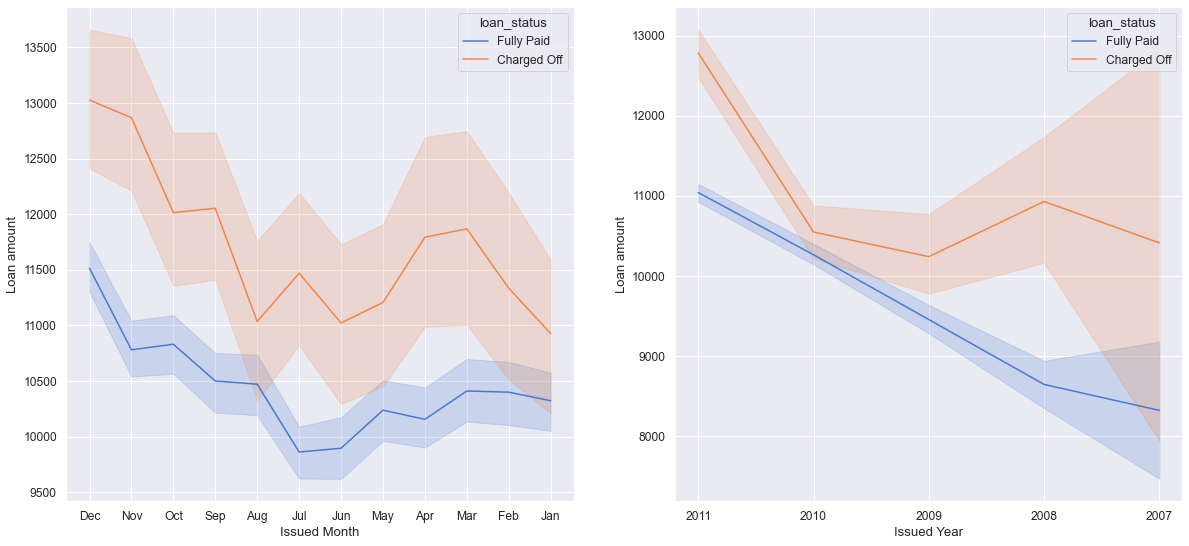

In [202]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='loan_amnt', x='issue_mn', hue ='loan_status',palette="muted")
plt.xlabel('Issued Month')
plt.ylabel('Loan amount')
plt.subplot(222)
sns.lineplot(data =loan,y='loan_amnt', x='issue_yr', hue ='loan_status',palette="muted")
plt.xlabel('Issued Year')
plt.ylabel('Loan amount')

## Loan amount vs Employement lenght

Text(0, 0.5, 'Loan amount')

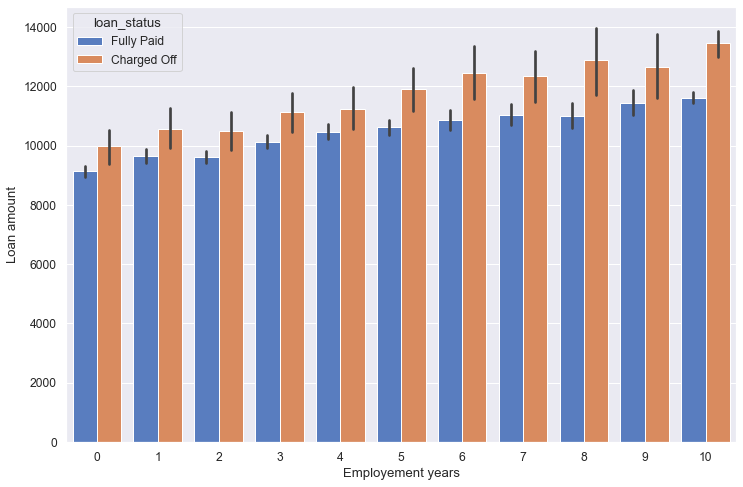

In [203]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="muted")
plt.xlabel('Employement years')
plt.ylabel('Loan amount')

Higher the years of employment, higher the Loan amount and as higher the chance of Charged off 

## Loan amount vs Verification status

Text(0, 0.5, 'Loan amount')

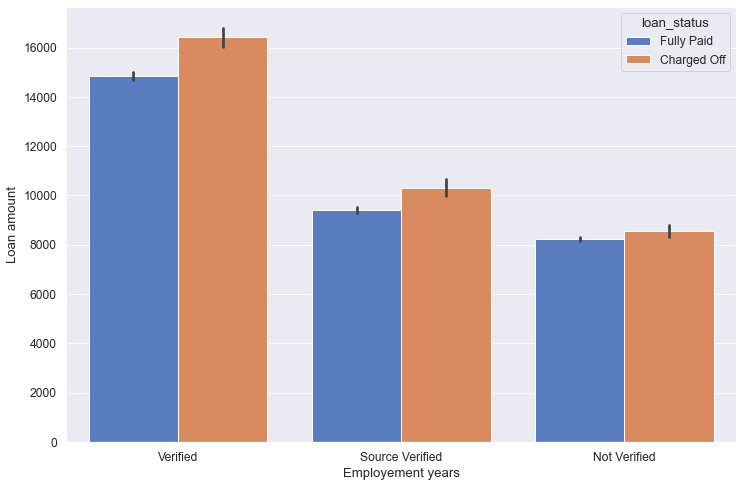

In [204]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="muted")
plt.xlabel('Employement years')
plt.ylabel('Loan amount')

If the income is verified, the loan maount is high

## Loan amount vs Term

Text(0, 0.5, 'Loan amount')

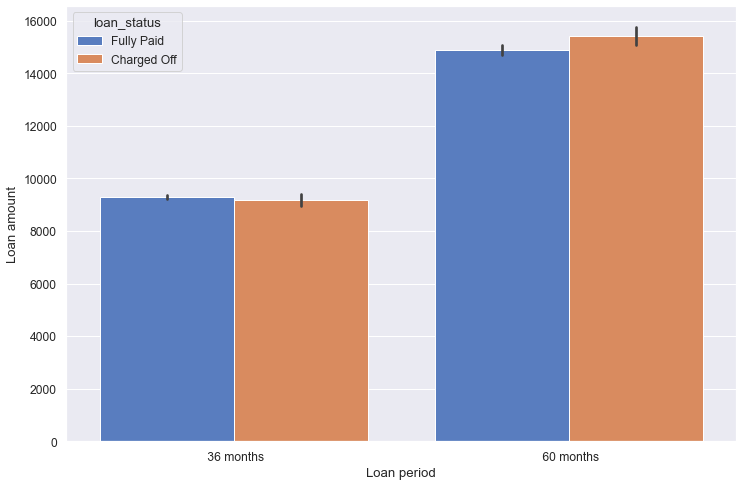

In [205]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,y='loan_amnt', x='term', hue ='loan_status',palette="muted")
plt.xlabel('Loan period')
plt.ylabel('Loan amount')

The applicant apply for high loan period if the loan amount is high

## Grade vs Interest rate

Text(0, 0.5, 'Grade')

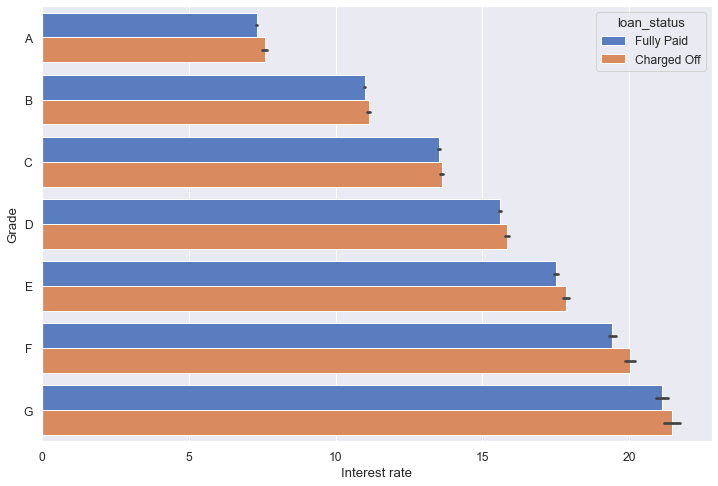

In [206]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="muted", order=['A','B','C','D','E','F','G'])
plt.xlabel('Interest rate')
plt.ylabel('Grade')

# Observation

## From the plot the following applicant has the high chance of Charged off

1) If the applicant Loan amount is higher than the annual income (85k 

2) Applicant with Low income and high interest rate

3) The person with income around (50k - 60k) applied for house, debt_consolidation, small business are high chance of Charged off. In that debt_consolication has the low income range. It may be reason of high charged off

4) Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

5) Applicant with Loan amount that has high interest rates

6) Loan amount is high for House, debt_consolidation, small_business as there is high chance of Charged off

7) Higher the years of employment, higher the Loan amount and as higher the chance of Charged off

8) Loan is verified and has issued a high Loam amount 

9) Applicant at the Grade G and interest rate of 20

10) Higher the loan with longer Loan period 